In [1]:
#fetching the datset from dropbox
!wget https://www.dropbox.com/sh/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra?dl=0

--2020-11-18 12:22:06--  https://www.dropbox.com/sh/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra [following]
--2020-11-18 12:22:07--  https://www.dropbox.com/sh/raw/h0alzt0hecb0qe7/AACIjw_MyPcnvCjy_arBO20Ra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4dccddc33bc192fb83bf0dfc5e.dl.dropboxusercontent.com/zip_download_get/Am3SSkndNohIHJKqzYHH2gpZlA3sPPAmhBcUb-8VV8IK6mM4tY7QEGvwLTLrYB_s9lsvjOfw6upMfaTaNx3UUVLWqUue2qayXAIJ9Fa2QO928w [following]
--2020-11-18 12:22:08--  https://uc4dccddc33bc192fb83bf0dfc5e.dl.dropboxusercontent.com/zip_download_get/Am3SSkndNohIHJKqzYHH2gpZlA3sPPAmhBcUb-8VV8IK6mM4tY7QEGvwLTLrYB_s9lsvjOfw6upMfaTaNx3U

In [ ]:
#unzipping the dataset folder
!unzip Ds

In [3]:
TRAIN_PATH="Ds/train"

In [5]:
VAL_PATH="Ds/val"

In [6]:
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [7]:
#model definition
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

#used to detect feature in very tiny areas of the image.Its gonna learn a hidden pattern.As you go deeper into the layered network,
#the receptive feild of the CNN increases. So, the feature it extracts are quite a bigger part of the original picture.
#(3x3) is the standard kernel size picked

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [9]:
#Train from scratch
#so we'll use the keras image data generator library to make the data ready for the mode
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [10]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    'train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 726 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'normal': 0, 'pf': 1}

In [12]:
#creating the validation function
validation_generator=test_dataset.flow_from_directory(
    'val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 164 images belonging to 2 classes.


In [73]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 62s 8s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.8353e-06 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 64s 8s/step - loss: 5.4652e-05 - accuracy: 1.0000 - val_loss: 1.2004e-06 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 62s 8s/step - loss: 7.8381e-04 - accuracy: 1.0000 - val_loss: 1.5647e-06 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 66s 8s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 4.0245e-06 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 64s 8s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 4.0636e-06 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 68s 9s/step - loss: 0.0060 - accuracy: 0.9961 - val_loss: 2.3517e-06 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 68s 9s/step - loss: 8.8442e-05 - accuracy: 1.0000 - val_loss: 4.1032e-06 - val_accuracy: 1

In [74]:
model.evaluate_generator(train_generator)

[3.924894826923264e-06, 1.0]

In [75]:
model.evaluate_generator(validation_generator)

[2.344213498872705e-06, 1.0]

In [76]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [77]:
import os

In [78]:
train_generator.class_indices

{'normal': 0, 'pf': 1}

In [79]:
y_actual=[]
y_test=[]

In [80]:
for i in os.listdir("./val/normal/"):
  img=image.load_img("./val/normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [81]:
for i in os.listdir("./val/pf/"):
  img=image.load_img("./val/pf/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [82]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm=confusion_matrix(y_actual, y_test)

In [85]:
import seaborn as sns

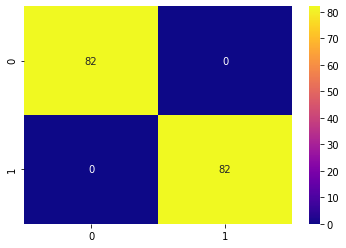

In [86]:
sns.heatmap(cm, cmap='plasma',annot=True)

In [87]:
#0->normal, 1->pf
# TP, FN
# FP,TN

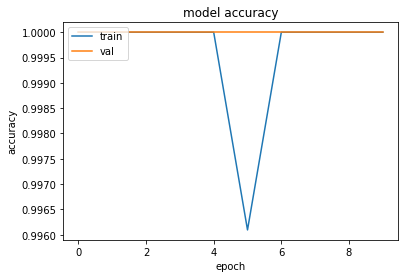

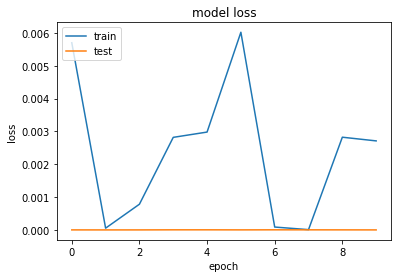

In [88]:
import matplotlib.pyplot as plt
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()